In [3]:
from manim import *
from manim_voiceover import VoiceoverScene
from manim_voiceover.services.gtts import GTTSService

Manim Community v0.17.3

/Users/mnica/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [4]:
##### HELPER FUNCTIONS

COLOR_LIST = [GREY_D,BLUE_B,YELLOW,TEAL_E,RED] # [GREY_D,BLUE,RED,PURPLE,GREEN] #GREEN,YELLOW,PURPLE,TEAL]
#THUMB_COLOR_LIST = [GREY_D,BLUE_B,YELLOW,GREEN_D,RED]


def LabeledTriangle(label='',my_scale=1,**triangle_args):
    tri = Triangle(**triangle_args).scale(my_scale)
    text = MathTex(label)
    text.set_x(tri.get_x())
    if len(label)==1:
        text.height = tri.height/2
        text.align_to(tri,DOWN)
        text.shift(my_scale*0.21*UP)
    if len(label)==2:
        text.height = tri.height/2.5
        text.align_to(tri,DOWN)
        text.shift(my_scale*0.15*UP)
        
    tri.set_z_index(-1)
    tri.set_fill(COLOR_LIST[0],opacity=1.0) #set it to the "0" color by default
    if label == '':
        return VGroup(tri)
    else:
        return VGroup(tri,text)
    
def generate_pascals_triangle(num_rows,mod_k=None):
    #generates num_rows of pascals triangle as a numpy array.
    # if mod_k is not None, will return mod k of each row
    pascal_t = np.zeros((num_rows, num_rows), dtype=int)
    pascal_t[0,0] = 1
    for i in range(num_rows-1):
        if mod_k:
            pascal_t[i+1,:] =np.mod( pascal_t[i,:] + np.roll(pascal_t[i,:],1) , mod_k)
        else:
            pascal_t[i+1,:] = pascal_t[i,:] + np.roll(pascal_t[i,:],1)
    return pascal_t


TRI = [LabeledTriangle(str(i),color=WHITE,stroke_width=0).scale(0.8) for i in range(25)]

EMPTY_TRI = VGroup(Triangle(color=WHITE,stroke_width=0).scale(0.8))
DELAY = 0.1




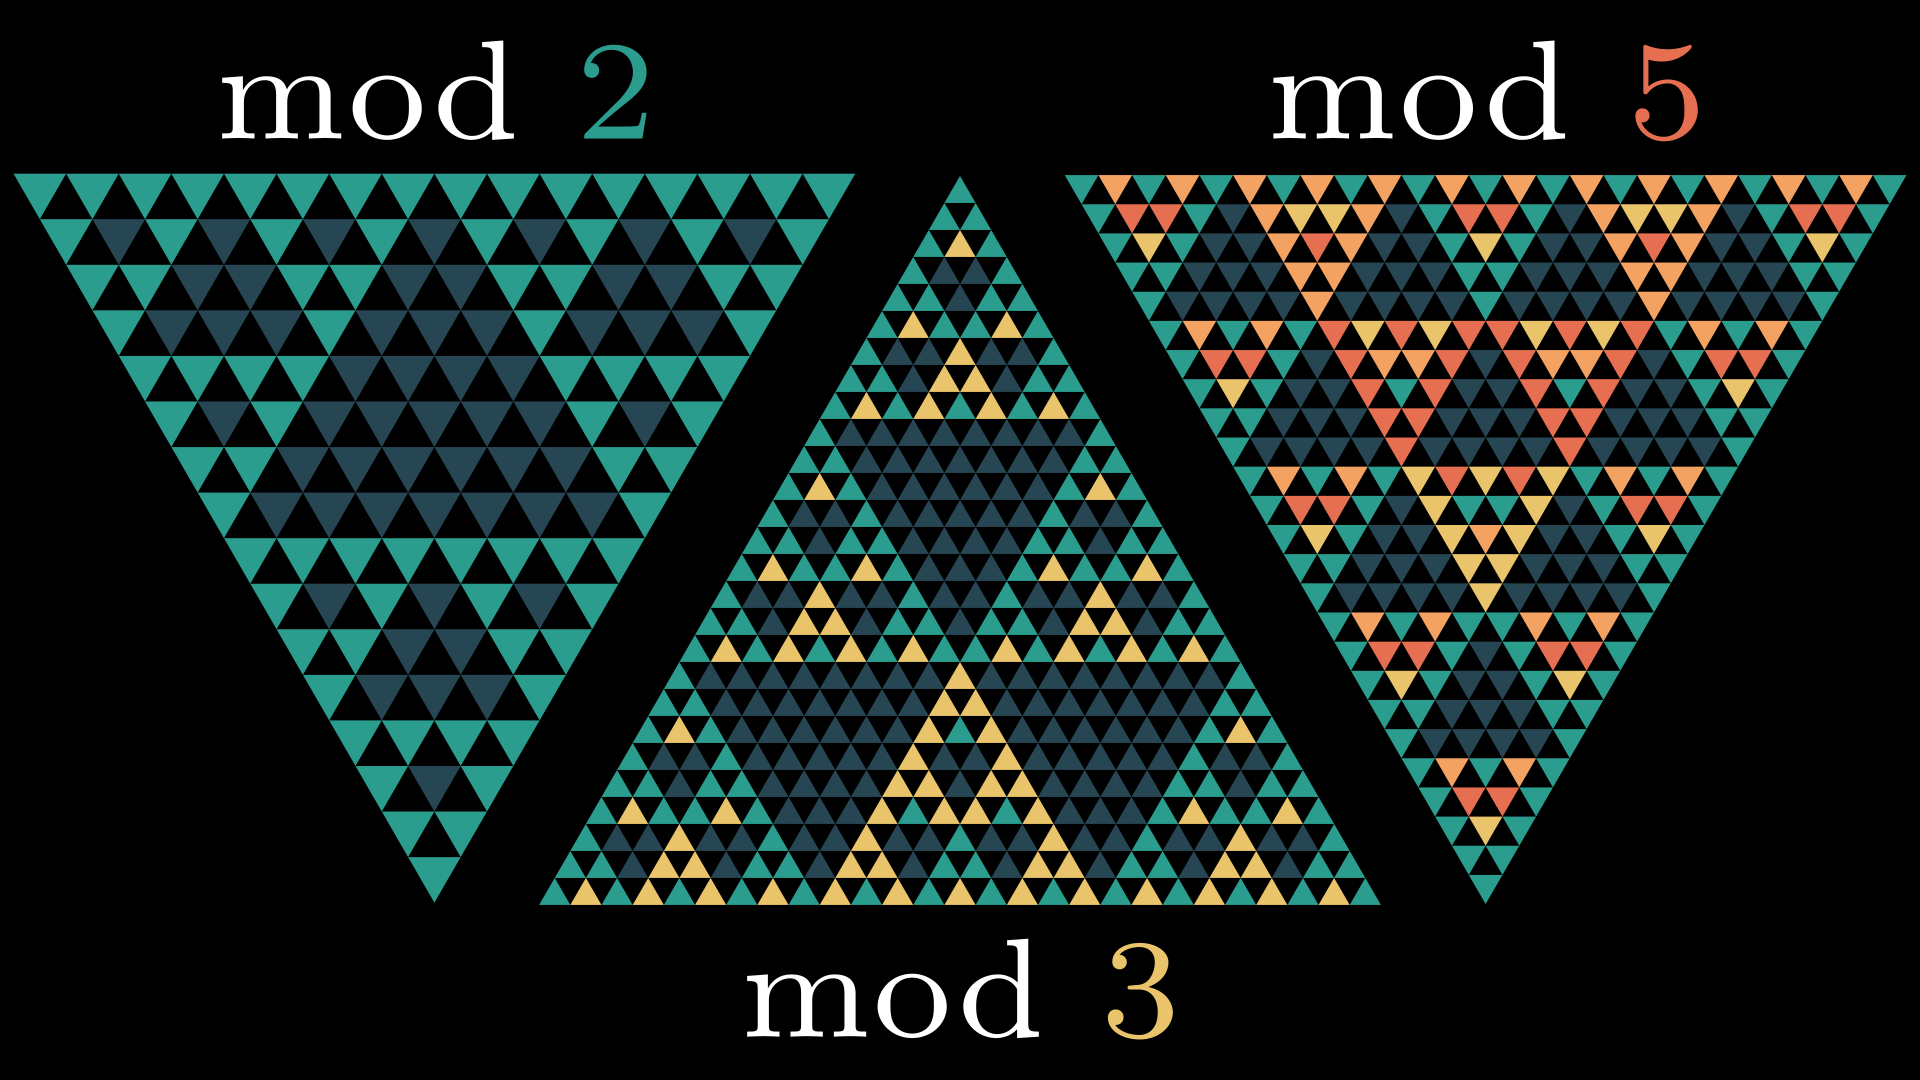

In [114]:
%%manim -qh -v CRITICAL thumb
#THUMB_COLOR_LIST = [GREY_D,BLUE_B,RED_B,PURPLE_B,GREEN_B]
#THUMB_COLOR_LIST = [GREY_D,BLUE_B,YELLOW,PURPLE,RED]

THUMB_COLOR_LIST = ['#264653','#2A9D8F','#E9C46A','#E76F51','#F4A261']

class thumb(Scene):
    def construct(self):
        labels = True
        ####CREAT THE GLOBAL VARIABLE P FOR PASCALS TRIANGLE MOBJECTS
        
        p_vals = [2,3,5]
        my_color_list = [THUMB_COLOR_LIST[1],THUMB_COLOR_LIST[2],THUMB_COLOR_LIST[-1]]
        my_n_rows = [16,27,25] #[2*2**3,2*3**2,2*5**1] #the places to zoom out to in the opening scene

        n_rows = max(my_n_rows) 

        P_val = generate_pascals_triangle(n_rows+1)
        #P_val_mod_k = generate_pascals_triangle(n_rows+1,mod_k = 2) #this is used for very large values of n_rows

        #setup one copy which is P
        P = [[None for i in range(n_rows)] for j in range(n_rows)]
        P[0][0] = VGroup(Triangle(color=WHITE,stroke_width=0).scale(0.8))
        P[0][0].to_edge(UP)

        w = P[0][0].width
        h = P[0][0].height
        x_init = P[0][0].get_x()
        y_init = P[0][0].get_y()

        #create and add all of pascals triangle mobjects in P[n][k]
        for n in range(n_rows):
            for k in range(n+1):
                tri = EMPTY_TRI.copy() #LabeledTriangle(str(P_val[n,k]),color=WHITE).scale(0.8)
                P[n][k] = P[0][0].copy() #tri #TRI[int(P_val[n,k])].copy() #set the triangle
                P[n][k].set_x(x_init + w*(k-0.5*n)) #set the position
                P[n][k].set_y(y_init - h*n)


        P_Group = [VGroup() for i in range(len(p_vals))] 
        P_mega_group = VGroup()
        for i, mod_k_color in enumerate(p_vals):
            #recolor all the triangles correctly
            for n in range(my_n_rows[i]): #recolor 20% extra to make sure changes can't be seen in the zoom out later
                for k in range(n+1):
                    P[n][k][0].set_fill(THUMB_COLOR_LIST[P_val[n,k] % mod_k_color],opacity=1.0)
                    P_Group[i] += P[n][k].copy()
        
            P_Group[i].height = 5.4
            if labels:
                #mod = Text("mod")
                text = MathTex(r"\scriptstyle{\text{mod }}",str(mod_k_color)).scale(3)
                text[1].color = my_color_list[i]
                #text[0].color = GREY_A
                #text = MathTex(r"\scriptsize{\text{mod }}",str(mod_k_color)).scale(2.2)
                #text[1].color = my_color_list[i]
                #print(list(enumerate(text)))
            else:
                text = Mobject()
            if i % 2 == 1:
                
                text.next_to(P_Group[i],DOWN)
                P_Group[i] += text
                P_Group[i].to_edge(DOWN,buff=0.3)
                P_Group[i].set_x(0)
                
            if i % 2 == 0:
                text.next_to(P_Group[i],UP)
                P_Group[i].rotate(angle=PI)
                P_Group[i] += text
                P_Group[i].to_edge(UP,buff=0.3)
                #P_Group[i].to_edge(UP,buff=0.3)
            
            if i == 0:
                P_Group[i].to_edge(LEFT,buff=0.1)
                
            if i == 2:
                P_Group[i].to_edge(RIGHT,buff=0.1)
            
            
            P_mega_group += P_Group[i]
            
        #P_Group[-][1].next_to(P_Group[1][0],DOWN)
        
        #P_mega_group -= P_mega_group[2]
        #P_Group[1].to_edge(RIGHT,buff=0.2)
        #P_Group[0].to_edge(LEFT,buff=0.2)
        
        #q = MathTex("?").scale(4) #Text(r"Pascal's Fractal",font="sans-serif").scale(1.5)
        #q.rotate(-PI/3)
        #q.color = GREY_A
        
        #text_2 = MathTex(r"\scriptstyle{\text{mod }}","2").scale(4)
        #text_2[1].color = my_color_list[0]
        #text_2.next_to(P_Group[0],DOWN)
        #
        #text_5 = MathTex(r"\scriptstyle{\text{mod }}","5").scale(4)
        #text_5[1].color = my_color_list[1]
        #text_5.next_to(P_Group[2],DOWN)
        
        
        
        #P_mega_group += text_2
        #P_mega_group += text_5
        
        #P_mega_group.to_edge(UP)
        #P_mega_group.arrange(buff=-2.5)
        self.add(P_mega_group)

In [122]:
%%manim --disable_caching -n 30 -ql -v  CRITICAL intro_pascal 
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?
PRE_DELAY = 1

#,fill_color = BLUE,fill_opacity=0.5
#COLOR_LIST = [GREY_D,BLUE,YELLOW,PURPLE,RED]
COLOR_LIST = THUMB_COLOR_LIST #['#264653','#2A9D8F','#E9C46A','#F4A261','#E76F51']

####CREAT THE GLOBAL VARIABLE P FOR PASCALS TRIANGLE MOBJECTS
my_n_rows = [2**4,3**3,2**5,2*5**2] #the places to zoom out to in the opening scene

n_rows = my_n_rows[-1]+26#add a few extra rows so that you can't see bottom of triangle

P_val = generate_pascals_triangle(n_rows+1)
#P_val_mod_k = generate_pascals_triangle(n_rows+1,mod_k = 2) #this is used for very large values of n_rows
P = [[None for i in range(n_rows)] for j in range(n_rows)]
P[0][0] = TRI[1].copy()
P[0][0].set_fill(COLOR_LIST[0],opacity=1.0)
P[0][0][1].color = WHITE
#STROKE_WIDTH = 1
#P[0][0][1].set_stroke(width=STROKE_WIDTH,color=BLACK)
P[0][0].to_edge(UP)

text_vgroup = VGroup()
text_vgroup += P[0][0][1]

w = P[0][0].width
h = P[0][0].height
x_init = P[0][0].get_x()
y_init = P[0][0].get_y()


#create and add all of pascals triangle mobjects in P[n][k]
for n in range(1,n_rows):
    for k in range(n+1):
        if n > 8:
            tri = EMPTY_TRI.copy() #LabeledTriangle(str(P_val[n,k]),color=WHITE).scale(0.8)
        else:
            tri = LabeledTriangle(str(P_val[n,k]),stroke_width=0).scale(0.8) #TRI[P_val[n,k]].copy()
            tri[1].color = WHITE
            #tri[1].set_stroke(width=STROKE_WIDTH,color=BLACK)
            text_vgroup += tri[1]
        P[n][k] = tri #TRI[int(P_val[n,k])].copy() #set the triangle
        P[n][k].set_x(x_init + w*(k-0.5*n)) #set the position
        P[n][k].set_y(y_init - h*n)

        
def AnimateIn(n,k): 
    #animation to bring in the box [n,k]
    anim_list = []
    if k > 0:
        anim_list.append(ReplacementTransform(P[n-1][k-1].copy(),P[n][k])) #left parent
    if k < n:
        anim_list.append(ReplacementTransform(P[n-1][k].copy(),P[n][k])) #right parent
    return anim_list

class intro_pascal(VoiceoverScene,MovingCameraScene):
    def construct(self):
        
        ##Voiceoversetup
        self.set_speech_service(GTTSService(lang="en", tld="com"))
        
        
        
        
        
        
        #save the camera state for zooming back in to this camera later
        self.camera.frame.save_state()
        
        my_text = "Pascal's triangle starts with a 1 at the top, and then all other numbers are created by simply summing the two numbers directly above it." 
        with self.voiceover(text=my_text) as tracker:
            self.play(Create(P[0][0]),run_time=1)
            #animate in first 5 rows
            for n in range(1,6):
                anim_list = []
                for k in range(n+1):
                    anim_list.extend(AnimateIn(n,k))
                self.play(*anim_list,run_time=1)
            
            for n in range(6,9):
                anim_list = []
                for k in range(n+1):
                    anim_list.extend(AnimateIn(n,k))
                if n == 6 or n==7:
                    init_y = n-1
                    final_y = n
                    camera_anim = self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(final_y)/2,0])).scale(final_y/init_y)
                    anim_list.append(camera_anim)
                self.play(*anim_list,run_time=1)
            
        
        
        #start with pascal's triangle on screen so we can zoom out to it!
        for n in range(9,n_rows):
            for k in range(n+1):
                self.add(P[n][k])
                
                
        #return animations for: 1. recoloring pascal's triangle, and 2. zooming out 
        #the final_y, and init_y tell you the final/inital rows to show in the zoom
        def ReColor_and_Zoom_Out_anims(mod_k_color,final_y,init_y):
            recolor_anim_list = []
            P_copy = [[None for n in range(n_rows)] for k in range(n_rows)]
            
            for n in range(n_rows): #recolor 20% extra to make sure changes can't be seen in the zoom out later
                for k in range(n+1):
                    P[n][k][0].generate_target()
                    P[n][k][0].target.set_fill(COLOR_LIST[P_val[n,k] % mod_k_color],opacity=1.0)
                    recolor_anim_list.append(MoveToTarget(P[n][k][0]))
        
            camera_anim = self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(final_y)/2,0])).scale(final_y/init_y)
            return recolor_anim_list,camera_anim
        
        
        
        
        my_text = "If you now color in the ODD numbers GREEN and leave the EVEN numbers in this dark charcoal color, a hidden pattern appears."
        with self.voiceover(text=my_text) as tracker:
            self.wait(0.75)
            #mod 2
            recolor_anim_list,camera_anim = ReColor_and_Zoom_Out_anims(mod_k_color=2,final_y=my_n_rows[0],init_y=7.5)
            #recolor first
            self.play(*recolor_anim_list,run_time=2)
        
        
        #Question: should we add in the big triangles to this animation?
        
        my_text = "Zooming out, we can see this pattern repeats itself and a beautiful triangular fractal emerges."
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
            #then zoom out
            self.play(FadeOut(text_vgroup),camera_anim,run_time=5) 
            self.wait(DELAY)
        
        
        my_text = "There are actually infinetly many fractals you can create by different colourings!"
        with self.voiceover(text=my_text) as tracker:
            self.wait(DELAY)
            
            
        my_text = "For example, if instead of even versus odd, you color based on divisibility by 3, we now see a different 3 color fractal appear" 
        with self.voiceover(text=my_text) as tracker:
            #mod 3 and zoom out
            self.wait(1)
            recolor_anim_list,camera_anim = ReColor_and_Zoom_Out_anims(mod_k_color=3,final_y=my_n_rows[1],init_y=my_n_rows[0])
            recolor_anim_list.append(camera_anim) #append the camera animation to recolor and zoom out at the same time
            self.play(*recolor_anim_list,run_time=5)
            self.wait(DELAY)
        
        
        my_text = "Another new one appears when you color based on divisibility by 4"
        with self.voiceover(text=my_text) as tracker:
            #mod 4 and zoom out
            self.wait(1)
            recolor_anim_list,camera_anim = ReColor_and_Zoom_Out_anims(mod_k_color=4,final_y=my_n_rows[2],init_y=my_n_rows[1])
            recolor_anim_list.append(camera_anim) #append the camera animation to recolor and zoom out at the same time
            self.play(*recolor_anim_list,run_time=5)
            self.wait(DELAY)

        #mod 5 and zoom out
        my_text = "And this is what it looks like when you colour using divisibility by 5."
        with self.voiceover(text=my_text) as tracker:
            recolor_anim_list,camera_anim = ReColor_and_Zoom_Out_anims(mod_k_color=5,final_y=my_n_rows[3],init_y=my_n_rows[2])
            recolor_anim_list.append(camera_anim) #append the camera animation to recolor and zoom out at the same time
            self.play(*recolor_anim_list,run_time=5)
            self.wait(DELAY)
            
        big_tri = Triangle(color=COLOR_LIST[1])
        big_tri.height = 25*h
        big_tri.align_to(P[0][0],UP)
        big_tri.set_fill(COLOR_LIST[1],opacity=0.5)
            
        my_text = "In this video, I will explain why these patterns appear in Pascal's triangle. There is actually just one simple fact about primes that unlocks the whole problem."
        with self.voiceover(text=my_text) as tracker:
            self.wait(DELAY)
        
        my_text="Once you understand this, you will directly see why the patterns copy themselves and repeat forever."
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
            self.play(FadeIn(big_tri))
            big_tri_2 = big_tri.copy()
            big_tri_2.align_to(P[25][0],UP)
            big_tri_2.align_to(P[49][0],LEFT)
            self.play(ReplacementTransform(big_tri.copy(),big_tri_2))
            
            big_tri_3 = big_tri.copy()
            big_tri_3.align_to(P[25][25],UP)
            big_tri_3.align_to(P[49][49],RIGHT)
            self.play(ReplacementTransform(big_tri.copy(),big_tri_3))
            
            
            big_tri_group = [big_tri.copy() for i in range(3)]
            big_tri_group[1].set_fill(COLOR_LIST[2],opacity=0.5)
            for i in range(3):
                big_tri_group[i].align_to(P[50][0],UP)
            
            big_tri_group[0].align_to(P[74][0],LEFT)
            #big_tri_group[1].align_to(P[74][0],LEFT)
            big_tri_group[2].align_to(P[74][74],RIGHT)
            
            anim_list = []
            anim_list.append(ReplacementTransform(big_tri_2.copy(),big_tri_group[0]))
            anim_list.append(ReplacementTransform(big_tri_2.copy(),big_tri_group[1]))
            anim_list.append(ReplacementTransform(big_tri_3.copy(),big_tri_group[1]))
            anim_list.append(ReplacementTransform(big_tri_3.copy(),big_tri_group[2]))
            self.play(*anim_list)
            self.wait(2)
            
            self.play(FadeOut(big_tri,big_tri_2,big_tri_3,big_tri_group[0],big_tri_group[1],big_tri_group[2]))
            self.wait(DELAY)
        
        my_text = "To see how everything works, lets Zoom back in and start at the beginning where the numbers were created in the first place."
        with self.voiceover(text=my_text) as tracker:
            #return camera to original position and fade out other triangles
            All_but_top_tri = VGroup()
            for n in range(1,n_rows):
                for k in range(n+1):
                    All_but_top_tri += P[n][k]
            fade_out_anim = FadeOut(All_but_top_tri)
            #play them with a lag, so the camera moves first
            self.play(LaggedStart(self.camera.frame.animate.restore(),FadeIn(P[0][0][1]),fade_out_anim,lag_ratio=0.3),run_time=6)

        self.wait(5)
        return 0
    

In [127]:
%%manim --disable_caching -ql -v CRITICAL scene_two_pascal 
class scene_two_pascal(VoiceoverScene,MovingCameraScene):
    def construct(self):
        ##Voiceoversetup
        self.set_speech_service(GTTSService(lang="en", tld="com"))


        
        
        self.add(P[0][0])
        #my_text = "Lets use this 5 color fractal as an example. The same ideas we see for 5 will work for any prime p"
        my_text = "a" #"We are going to re-draw Pascal's triangle colouring each number as we go. We will decide on the color of each based on the remainder when divided by 5."
        with self.voiceover(text=my_text) as tracker:
            self.wait(2)
        
        my_text = "a" #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            text = MathTex(r"\text{Colors mod } 5").scale(1.5)
            text.to_corner(UL)
            self.play(FadeIn(text,shift=DOWN))
        
        color_rects = VGroup(*[Rectangle().scale(0.35) for i in range(5)]).arrange(DOWN)
        color_rects.next_to(text,DOWN)
        color_rects.to_edge(LEFT)
        for i in range(5):
            color_rects[i].set_fill(COLOR_LIST[i],opacity=1.0)
            
        my_text = "We'll use this dark charcoal color to color in any number that is perfectly divisible by 5" #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            self.play(FadeIn(color_rects[0],shift=DOWN))
        
        math_labels = [None for i in range(5)]
        for i in range(5):
            math_labels[i] = MathTex(r"=",str(i),r",",str(i+5),r",",str(i+10),r"\ldots").scale(1.25)
            math_labels[i].next_to(color_rects[i],RIGHT)
            
        my_text = "like 5, 10, 15 and so on" #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            self.play(FadeIn(math_labels[0],shift=RIGHT))
        
        my_text = "This green color is for anything that leaves a remainder of 1 when you divide by 5" #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            self.play(FadeIn(color_rects[1],shift=DOWN))
            
        my_text = "like 1, 6, or 11" #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            self.play(FadeIn(math_labels[1],shift=RIGHT))
        
        my_text = "Similarly these other colors will represent remainders 2,3 and 4." #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            self.play(*[FadeIn(color_rects[k],shift=DOWN) for k in [2,3,4]])
            self.play(*[FadeIn(math_labels[k],shift=RIGHT) for k in [2,3,4]])
        
        
        my_text = "For each of these 5 colors, it is easier to just remember the remainder, which is always between 0 and 4.  We use this funny triple equals sign to write down this idea of only caring about the remainder when we divide by 5" #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            math_labels_new = [None for i in range(5)]
            for i in range(5):
                math_labels_new[i] = MathTex(r"\equiv",str(i)).scale(1.25)
                math_labels_new[i].next_to(color_rects[i],RIGHT)
            for i in range(5):
                self.play(*[TransformMatchingTex(math_labels[i],math_labels_new[i])])
        
        my_text = "We can now create Pascal's triangle like we originally did by adding up the 2 numbers above each entry to get the next number"
        with self.voiceover(text=my_text) as tracker:
            for n in range(1,4):
                anim_list = []
                for k in range(n+1):
                    anim_list.extend(AnimateIn(n,k))
                self.play(*anim_list,run_time=1)
                
        my_text = "The first interesting thing happens in the fourth row when we add 3+3. This addition wraps around 5 so to speak and so is colored in using the remainder 1 color."
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
            anim_list = []
            n=4
            k=2
            anim_list.extend(AnimateIn(n,k))
            self.play(*anim_list,run_time=2)
       
        my_text = " Thinking only in terms of remainders, we would write this as 3+3 is equivalent to 1 modulo 5."
        with self.voiceover(text=my_text) as tracker:
            math = MathTex("3","+","3","\equiv","1").scale(2)
            math[0].color = COLOR_LIST[3]
            math[2].color = COLOR_LIST[3]
            math[4].color = COLOR_LIST[1]
            
            math.to_corner(UR)
            math.set_y( P[4][2][1].get_y() )
            
            self.play(ReplacementTransform(P[3][1].copy(),math[0]),ReplacementTransform(P[3][2].copy(),math[2]),ReplacementTransform(P[4][2].copy(),math[4]),FadeIn(math[1],math[3]))
        
        my_text = "This is the great power of looking only at the remainders; we can always work with just the number 0 to 4 only and forget about the original number."
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
        
        my_text = "We can completely erase the number 6 and literally replace it with a 1. This means the numbers on pascal's triangle will always stay manegeable even as we move down the triangle."
        with self.voiceover(text=my_text) as tracker:
            temp = P[0][0][1].copy()
            temp.set_x(P[4][2][1].get_x())
            temp.set_y(P[4][2][1].get_y())            
            self.play(ReplacementTransform(P[4][2][1],temp))
        
        my_text = "Filling in the rest of the 4th row, we see the interesting looking alternating pattern 1,4,1,4,1."
        with self.voiceover(text=my_text) as tracker:
            n = 4
            anim_list = [FadeOut(math)]
            for k in [0,1,3,4]:
                anim_list.extend(AnimateIn(n,k))
            self.play(*anim_list,run_time=1)
        
        my_text = "And on the next line a minor mathematical miracle happens! Other than the trivial 1s on the ends, this row has numebrs which are ALL divisible by 5."
        with self.voiceover(text=my_text) as tracker:
            n = 5
            anim_list = []
            for k in range(n+1):
                anim_list.extend(AnimateIn(n,k))
            #final_y = 6
            #init_y = 5
            #camera_anim = self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(final_y)/2,0])).scale(final_y/init_y)
            #anim_list.append(camera_anim)
            self.play(*anim_list,run_time=1)
    
        my_text = "This is because 4+1 is equivalent to 0 modulo 5."
        
        my_text = "It is not a coincidence that this miracle row of all zeros happened exactly on row number 5. Indeed, for any prime p, the p-th row will always be made of all zeros! This can be proven by using the binomial coefficeint formula for the p-th row of Pascal's triangle, p choose k. Writing this out as a fraction, there is a p in the numererator that can never be cancelled out by the denominator when p is a prime. So the the p-th row will always be divisible by p! In our modulo/remainder world, this means there is a row of all zeros the appears!"

        my_text = "And a row of all zeros is exactly the conditions needed for the "
        self.wait(4)
            
        

In [4]:
####CODE TO ANIMATE IN ONE BOX AT A TIME
# def AnimateIn(n,k): 
#            #animation to bring in the box [n,k]
#            anim_list = []
#            if k > 0:
#                anim_list.append(Transform(P[n-1][k-1].copy(),P[n][k])) #left parent
#            if k < n:
#                anim_list.append(Transform(P[n-1][k].copy(),P[n][k])) #right parent
#            return anim_list
        
        
        
#        #animate in the first 5 rows with no color, 1 row at a time
#        if False:
#            for n in range(1,5):
#                anim_list = []
#                for k in range(n+1):
#                    anim_list.extend(AnimateIn(n,k))
#                self.play(*anim_list)
       
  
        #Create the first one
        #P[0][0][0].set_fill(BLUE,opacity=1.0)
        #self.play()
        #self.wait(DELAY)
        #P_copy = P[0][0].copy()
        #P_copy[0].set_fill(BLUE,opacity=1.0)
        #self.play(Create(P[0][0]),FadeTransform(P[0][0],P_copy))
        
        
        #self.play(FadeIn(P[0][0],shift=DOWN).copy())    
        #set color for odd guys!
        
        
        #for n in range(my_n_rows[0]):
        #    for k in range(n+1):
        #        P[n][k][0].set_fill(COLOR_LIST[P_val_mod_k[n,k]], opacity=1.0)
      
    
        #reanimate first 5 rows, this adds in the colors!
        #for n in range(1,5):
        #    anim_list = []
        #    for k in range(n+1):
        #        anim_list.extend(AnimateIn(n,k))
        #    self.play(*anim_list)
        
        #add more rows while zooming out
        #for n in range(5,n_rows):
        #    anim_list = []
        #    for k in range(n+1):
        #        anim_list.extend(AnimateIn(n,k))
            
        #    anim_list.append(self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(n+1)/2,0])).scale(1.0+1.0/n))
        #    self.play(*anim_list) #,rate_func=linear,run_time=0.5
            #self.play(
                #AnimationGroup(
                #    self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(n+1)/2,0])).scale(1.0+1.0/n),
                #    #self.camera.frame.ScreenRectangle.animate.set_height((n+1)*h+4),
                #    *anim_list,
                #    rate_func=linear,
                #),
                #rate_func=linear,
                #run_time=0.5,
            #)
            #self.play(*anim_list)
                
            #self.play(*anim_list)
